<a href="https://colab.research.google.com/github/pranav-kaushal/NLP-Project-Sentiment-Analysis/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

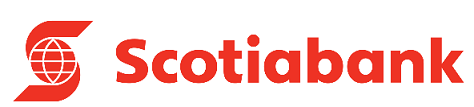**Twitter Sentiment Analysis**

In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install langdetect
!pip install nltk
!pip install unidecode
!pip install textaugment
!pip install joypy
!pip install wordcloud
!pip install better_profanity

In [ ]:
# Import Libraries
import sys
import tweepy
import pandas as pd
import numpy as np
import os
import spacy
import joypy
import unidecode
import unicodedata
import seaborn as sns
from PIL import Image

# NLP Libraries
import re
import string
import nltk
nltk.download('brown')
from matplotlib import pyplot as plt
from matplotlib import cm
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
from nltk.corpus import brown
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perception_tagger')
nltk.download('omw')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from better_profanity import profanity

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading averaged_perception_tagger: Package
[nltk_data]     'averaged_perception_tagger' not found in index
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Gathering Data from Twitter using API

### Authentication Keys (Individual Account)

API account
https://developer.twitter.com/en/portal/dashboard

In [ ]:
# Authentication
consumerKey = "Gqxmwe06eIqw0NBmCi0L1rmbh"
consumerSecret = "cborR6m0P5LnLB1U2WV4Wz4zI4Wazs9BE1v31x2bcMeeSkm0pf"
accessToken = "1378575615981457409-Aotg3k1WfJu8l8kM8sbs2utHbTFeaO"
accessTokenSecret = "RmH71WeV1XyF66veJJh78vILJ5lt5MqaNNPpbQqZ8E2jm"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

### Gathering Tweets- Tweet cap 
500,000 Tweets / month
PER PROJECT

In [ ]:
# User Search and No of Tweets to capture
tweet_lst=[]
users = ['@globeinvestor','@bloombergCA','@Marketcall','@LA&C Investments','@TheMotleyFoolCA','@BNNBloomberg','@YahooFinanceCA','@StockTrades_CA','@rcarrick','@marketsglobe','@PattieCTV','@Streetwise','@stockchase',
'@financialpost','@FinMKTG','@JonChevreau','@MoneySense','@BoomerandEcho','@squawkfox','@reformedbroker','@thestalwart' ,'@michaelbabad','@FTalphaville','@dbcurren',
'@benrabidoux','@noahpinion','@boes_','@sbarlow_ROB','@amberkanwar','@business','@elerianm','@reutersjamie','@M_C_Klein',
'@economistmeg','@tylercowen','@nictrades','@ReformedBroker','@TheStalwart','@VitalikButerin','@ritholtz','@LizAnnSonders',
'@IvanTheK','@charliebilello','@satoshilite',
'@ritholtz','@awealthofcs','@RaoulGMI','@MarkYusko','@allstarcharts','@5_min_macro','@longshorttrader','@ScottMinerd','@Callum_Thomas','@RyanDetrick','@TheBubbleBubble','@KeithMcCullough',
'@Ukarlewitz','@cullenroche','@DougKass']

# Failed to retrieve
#'@LA&C Investments','@katie_martin_FX','@mikepmoffat'


# For loop to run the list of usernames and then for loop to extract Full Text from the tweets
for user in users:
    tweets = api.user_timeline(screen_name = user, count = 10, lang = "en", tweet_mode = "extended")
    for tweet in tweets:
      tweet_lst.append(tweet.full_text)
    #print(f"- {tweet.full_text}")


In [ ]:
# Keyword Search and No of Tweets to capture
search_keyword = ['scotiabank','BNS','Canadian Banking','Canadian Banks','Earnings release','EPS','Profits','Reserves','Provisions',
                  'Credit cards','Personal loans','Loan growth','Loan origination','Credit quality','Delinquency','Past due loans',
                  'Impaired loans','Allowances','Reserves','Loan loss','Credit loss','Vintage','Write offs','Collections','Strategy',
                  'Big5','PCL', 'Risk','Retail lending','Secured loans','Unsecured loans','Mortgages','Home equity loans','Auto loans',
                  'Line of credit']
# For loop to run the list of keywords and then for loop to extract Full Text from the tweets
for search in search_keyword:
    tweets = api.search(q = search, lang = "en",tweet_mode = "extended",count = 10, coordinates = "-79.384293,43.653908,10000km") # add other cities as well.
    for tweet in tweets:
      tweet_lst.append(tweet.full_text)
tweet_lst[:5]

['Ten-year U.S. Treasuries at 2%? Bring it on, investors say https://t.co/ddOKqjLw81',
 'Global ETFs draw record inflows in first half of 2021 https://t.co/SAR0hqSP8z',
 'The homeowner’s life: ‘Endless fear of hearing a strange noise’ https://t.co/6c9xG5syz6',
 'RT @MarketsGlobe: Canadian dollar dips as risk appetite turns more cautious https://t.co/10wkxzxTXI (subscribers)',
 'Will ‘pandemic stocks’ remain attractive for investors’ portfolios? https://t.co/F7B1wyoUA4']

In [ ]:
# Print and analyze the tweets in raw text
tweet_lst[0:-1]

['Ten-year U.S. Treasuries at 2%? Bring it on, investors say https://t.co/ddOKqjLw81',
 'Global ETFs draw record inflows in first half of 2021 https://t.co/SAR0hqSP8z',
 'The homeowner’s life: ‘Endless fear of hearing a strange noise’ https://t.co/6c9xG5syz6',
 'RT @MarketsGlobe: Canadian dollar dips as risk appetite turns more cautious https://t.co/10wkxzxTXI (subscribers)',
 'Will ‘pandemic stocks’ remain attractive for investors’ portfolios? https://t.co/F7B1wyoUA4',
 'Outdoor grills maker Weber targets over US$8-billion valuation in IPO https://t.co/8Upj1Z3dSF',
 'RT @MarketsGlobe: Premarket: Asian stocks hit 2021 lows on China tech selling, real yields drop before Fed https://t.co/nszrW4huDq (subscri…',
 'As restaurants begin to reopen, how are their stocks doing? https://t.co/XRy6pORC0N',
 'Managing your personal finances on a smartphone? It’s addictive https://t.co/KrAOLrtv8h',
 'Cash-hungry emerging markets arrive late to the SPAC party https://t.co/jaXSCsKPQE',
 'China spent y

In [ ]:
# Create a copy of the list to work on
tw_copy = tweet_lst.copy()

### Using Pipeline to clean text

Make text lowercase
Remove punctuation
Remove emoji’s
Remove stopwords
Lemmatization

In [ ]:
# Cleaning pipeline (RT, Punctuation etc)

stop_words = set(stopwords.words('english')+['http','rt','https'])

lemmer = WordNetLemmatizer()

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()
    # The profanity.censor method is used to mask inappropriate words with special characters. The default setting uses “*”
    x = profanity.censor(x)
    #Removing RT
    x = re.sub('RT @\w+: '," ",x)
    # Remove all single characters
    x = re.sub(r'\s+[a-zA-Z]\s+', ' ',x)
    # Remove punctuation
    x = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
    # Lower case
    x = x.lower()
    # Remove non-unicode
    x = unidecode.unidecode(x)
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x)

In [ ]:
# Test preprocessing pipeline
preprocess('RT http:// @ #$#% what the duck is wrong with the bank')

'duck wrong bank'

In [ ]:
# Import re module to use regular expression
import re
# Declare a list that contains the search word
#search_word = "playoff"
list1 = []
# Using lambda expression filter the data
for x in tw_copy:
  if "playoff" not in x:
    list1.append(x)
  elif "arena" not in x:
    list1.append(x)
  elif "game" not in x:
    list1.append(x)
  elif "hockey" not in x:
    list1.append(x)
  elif "NHL" not in x:
    list1.append(x)
  elif "StanleyCup" not in x:
    list1.append(x)

In [ ]:
tweet_list = pd.DataFrame(list1)  # Converting the list to Pandas DataFrame
tweet_list.columns=['tweets'] # Renaming the column 0 to tweets
tweet_list.head() # Display first 5 rows

,tweets
0,"Ten-year U.S. Treasuries at 2%? Bring it on, i..."
1,Global ETFs draw record inflows in first half ...
2,The homeowner’s life: ‘Endless fear of hearing...
3,RT @MarketsGlobe: Canadian dollar dips as risk...
4,Will ‘pandemic stocks’ remain attractive for i...


In [ ]:
# Import the file from local machine
from google.colab import files
tweet_list.to_csv('tweet_list.csv')

In [ ]:
# Apply Preprocessing pipeline to Tweets Dataframe
tweet_list['tweets'] = tweet_list['tweets'].apply(preprocess)
# Check for duplicates and drop them.
tweet_list['tweets'].drop_duplicates(inplace = True)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/LVooRyojRD" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/ReYFDJ2fqb" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


## Sentiment Analysis using TextBlob

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
# TextBlod finds all the words and phrases that it can assign polarity and subjectivity to, and average all of them together. 
  #Sentiment Labels: Each word in a corpus is labeled in terms of polarity and subjectivity. A corpus’ sentiment is the average of these.
  #Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
  #Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

tweet_list[['polarity', 'subjectivity']] = tweet_list['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list['tweets'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tweet_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tweet_list.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list.loc[index, 'sentiment'] = "neutral"
    tweet_list.loc[index, 'neg'] = neg
    tweet_list.loc[index, 'neu'] = neu
    tweet_list.loc[index, 'pos'] = pos
    tweet_list.loc[index, 'compound'] = comp

tweet_list.head(10)

,tweets,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,ten year u treasury bring investor say,0.000000,0.000000,positive,0.000,0.735,0.265,0.2023
1,global etf draw record inflow first half,0.027778,0.166667,neutral,0.000,1.000,0.000,0.0000
2,homeowner life endless fear hearing strange noise,-0.087500,0.450000,negative,0.500,0.500,0.000,-0.6124
3,canadian dollar dip risk appetite turn cautiou...,0.000000,0.000000,negative,0.368,0.632,0.000,-0.3612
4,pandemic stock remain attractive investor port...,0.800000,1.000000,positive,0.000,0.633,0.367,0.4404
5,outdoor grill maker weber target u billion val...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,premarket asian stock hit low china tech selli...,0.066667,0.200000,negative,0.276,0.724,0.000,-0.4939
7,restaurant begin reopen stock,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,managing personal finance smartphone addictive,0.000000,0.600000,neutral,0.000,1.000,0.000,0.0000
9,cash hungry emerging market arrive late party,-0.300000,0.600000,positive,0.000,0.690,0.310,0.4019


In [ ]:
# Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tweet_list[tweet_list["sentiment"]=="negative"]
tw_list_positive = tweet_list[tweet_list["sentiment"]=="positive"]
tw_list_neutral = tweet_list[tweet_list["sentiment"]=="neutral"]

In [ ]:
tw_list_negative.head()

,tweets,polarity,subjectivity,sentiment,neg,neu,pos,compound
2,homeowner life endless fear hearing strange noise,-0.087500,0.450,negative,0.500,0.500,0.000,-0.6124
3,canadian dollar dip risk appetite turn cautiou...,0.000000,0.000,negative,0.368,0.632,0.000,-0.3612
6,premarket asian stock hit low china tech selli...,0.066667,0.200,negative,0.276,0.724,0.000,-0.4939
14,oil edge higher investor ass demand amid delta...,0.250000,0.500,negative,0.417,0.583,0.000,-0.6124
18,reigning olympic gymnastics champion simone bi...,0.025000,0.675,negative,0.298,0.505,0.197,-0.2500


In [ ]:
# Function for count_values_in single columns
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tweet_list,"sentiment")

,Total,Percentage
positive,459,49.46
neutral,280,30.17
negative,189,20.37


# EDA (Exploratory Data Analysis)

### Hastag Frequency

In [ ]:
# Function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

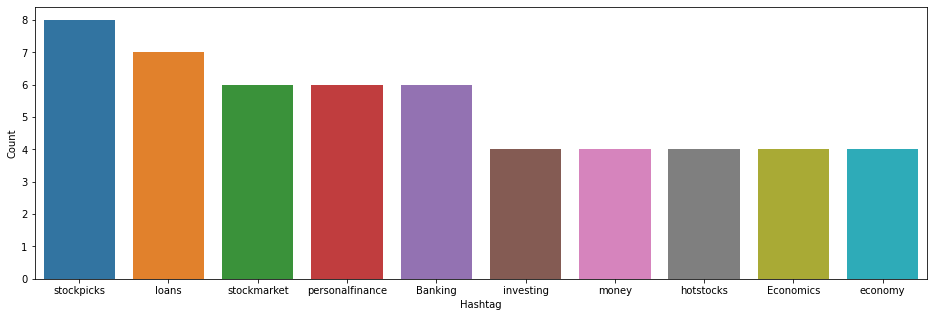

In [ ]:
HT = hashtag_extract(tw_copy) # Using the original list which is uncleaned to extract hashtags
# unnesting list
HT = sum(HT,[])
a = nltk.FreqDist(HT)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
# Tokenize the Tweets
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer

def tokenize_tweets(myString):
    tokens = word_tokenize(myString)
    #stemmer = PorterStemmer()
    #result = ([stemmer.stem(w).lower() for w in x.split()]) for x in tokens if x.lower() not in stopwords.words('english')]
    result = [token.lower() for token in tokens if token.lower() not in stop_words]
    return result

tok_tweet_list = tweet_list['tweets'].apply(tokenize_tweets)
print(tok_tweet_list)

0         [ten, year, u, treasury, bring, investor, say]
1       [global, etf, draw, record, inflow, first, half]
2      [homeowner, life, endless, fear, hearing, stra...
3      [canadian, dollar, dip, risk, appetite, turn, ...
4      [pandemic, stock, remain, attractive, investor...
                             ...                        
923    [happy, greta, yes, ti, true, country, like, u...
924    [day, consistently, building, business, credit...
925    [bom, product, design, little, late, birthday,...
926    [scm, group, european, investment, bank, bei, ...
927    [remember, credit, line, pretty, good, year, l...
Name: tweets, Length: 928, dtype: object


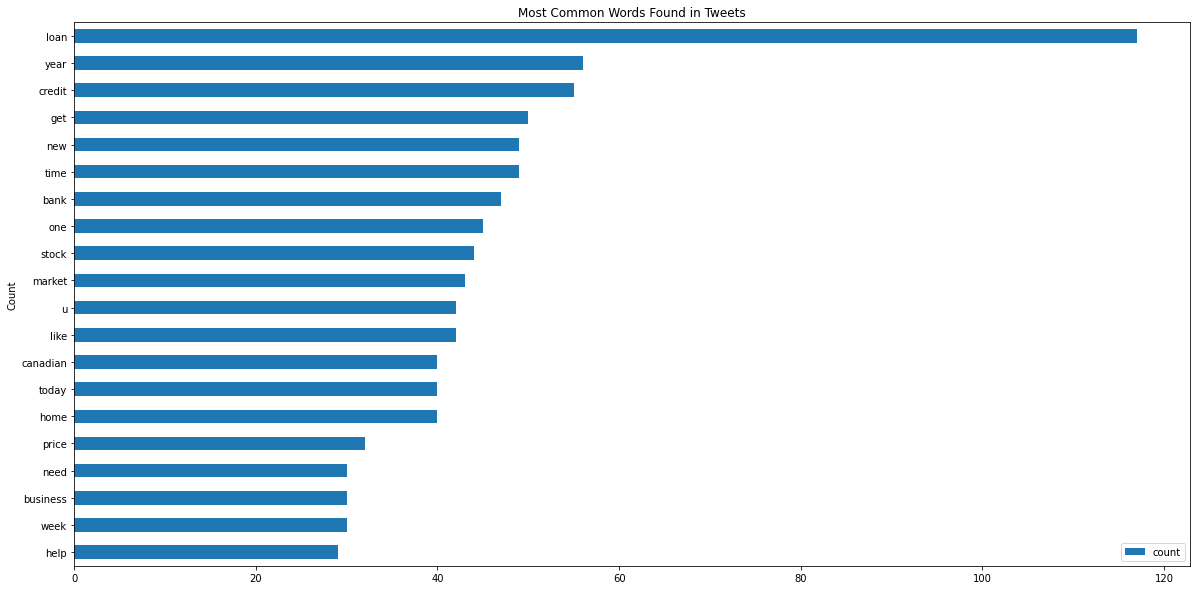

In [ ]:
# Returns most common terms, aside from stop words #
import itertools
import collections
# List of all words across tweets
def most_common(terms_all):
  words_in_tweet = [tweet for tweet in terms_all]
  interesting_terms = list(itertools.chain(*words_in_tweet))
  # Create counter
  counts = collections.Counter(interesting_terms)
  return counts.most_common(20)

# Plot horizontal bar graph

most_comm = pd.DataFrame(most_common(tok_tweet_list),columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(20, 10))
most_comm.sort_values(by='count').plot.barh(x='words',y='count',ax=ax)
ax.set_title("Most Common Words Found in Tweets")
ax.set(ylabel = 'Count')
plt.show()

### Wordcloud

In [ ]:
from nltk.tokenize import WordPunctTokenizer
from nltk import PorterStemmer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

def get_bigrams(myString):
    tokenizer = WordPunctTokenizer()
    tokens = tokenizer.tokenize(myString)
    stemmer = PorterStemmer()
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigrams = bigram_finder.nbest(BigramAssocMeasures.pmi,100)

    for bigram_tuple in bigrams:
        x = "%s %s" % bigram_tuple
        tokens.append(x)

    result = [' '.join([stemmer.stem(w).lower() for w in x.split()]) for x in tokens if x.lower() not in stopwords.words('english') and len(x) > 4]
    return result

for line in tweet_list['tweets']:
    features = get_bigrams(line)
print(features)

['rememb', 'credit', 'pretti', 'later', 'credit', 'credit', 'consid', 'small', 'actual', 'would', 'credit', 'fraction', 'lower', 'middl', 'class', 'seem', 'fever', 'dream', 'actual poor', 'class seem', 'consid small', 'fever dream', 'fraction size', 'good year', 'lower middl', 'middl class', 'poor would', 'pretti good', 'size lower', 'would get', 'year later', 'like actual', 'like fever', 'seem like', 'small like', 'get credit', 'later credit', 'line consid', 'line fraction', 'line pretti', 'rememb credit', 'credit line', 'line credit']


In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
  stopwords = set(STOPWORDS)
  wc = WordCloud(stopwords=stopwords,max_words=200,background_color="Black", )
  wc.generate(text)
  wc.to_file("wc.png")
  #print("Word Cloud Saved Successfully")
  path="wc.png"
  display(Image.open(path))

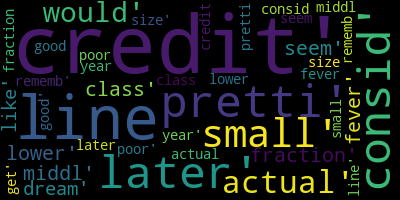

In [ ]:
#create_wordcloud(NewNounString)
create_wordcloud(str(features))

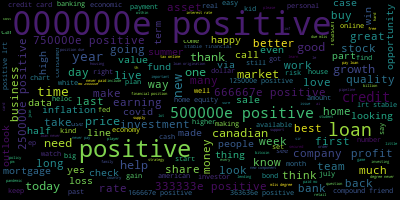

(None,)

In [ ]:
create_wordcloud(tw_list_positive.to_string()),

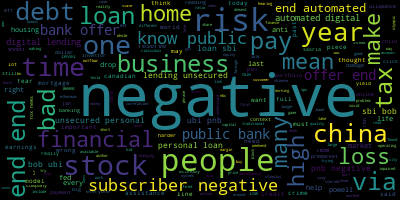

In [ ]:
create_wordcloud(tw_list_negative.to_string())

### Joyplot

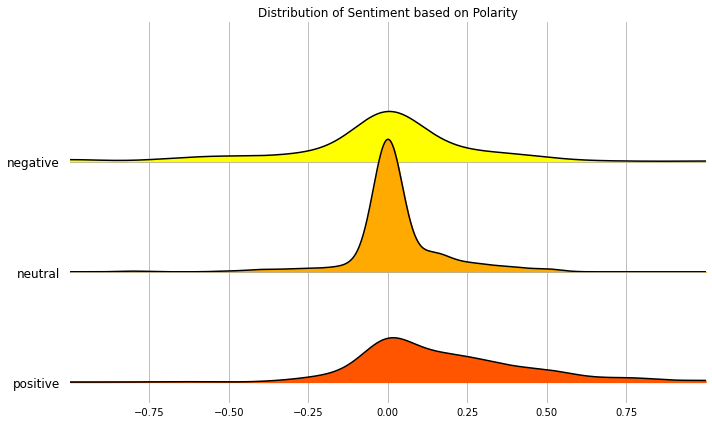

In [ ]:
# Joy Plot
import matplotlib

sm = matplotlib.cm.ScalarMappable(cmap=cm.autumn_r)
%matplotlib inline
ar = tweet_list.value_counts()
fig, axes = joypy.joyplot(tweet_list ,grid=True,by=['sentiment'],column=['polarity'],ylabelsize=12,title="Distribution of Sentiment based on Polarity",figsize=(10,6),colormap=cm.autumn_r,x_range=[-1,0,1])

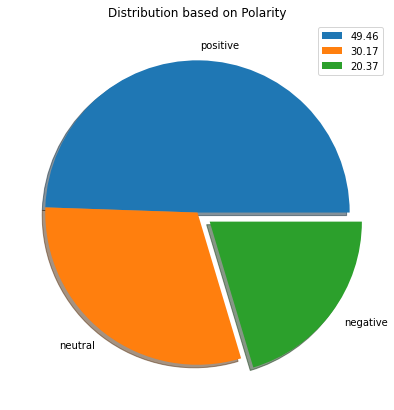

In [124]:
#Creating PieCart
pichart = count_values_in_column(tweet_list,"sentiment")
index = pichart.index
percent = pichart["Percentage"]
explode = (0, 0 ,0.1)  # explode 1st slice
fig = plt.figure(figsize =(10, 7))
plt.title("Distribution based on Polarity")
plt.pie(percent, explode = explode, labels = index, shadow = True)
plt.legend(percent)
plt.show()


References:
https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb

https://towardsdatascience.com/detecting-hate-tweets-twitter-sentiment-analysis-780d8a82d4f6

https://github.com/DrManishSharma/NLP/blob/master/SentiAnalysis.ipynb

Topic Modeling

In [ ]:
# LDA or Latent Dirchlet Allocation, is one of the most popular topic modeling algorithms around. 
# LDA is a generative statistical model that allows observations to be explained by unobserved groups that explain why parts of the data are similar. 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.2, min_df=0.02, max_features = 1000, ngram_range = [1,2])
dtm = vectorizer.fit_transform(tweet_list['tweets'])

In [ ]:
dtm.shape

In [ ]:
vectorizer.get_feature_names()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components = 10, doc_topic_prior = None, topic_word_prior = None, max_iter = 200, learning_method = 'batch', random_state = 123, n_jobs = 2, verbose =0)
lda_output = lda_model.fit(dtm)

In [ ]:
feature_names = vectorizer.get_feature_names()
termss = list()
for topic_id, topic in enumerate(lda_model.components_):
  terms = ' '.join([feature_names[i] for i in topic.argsort()[:-6 - 1:-1]])
  termss.append(terms)

topic_summary = pd.DataFrame({'TopicID':range(0, len(termss)), 'Terms': termss})

In [ ]:
topic_summary

#Modeling

In [ ]:
# Using the Regex tokenizer from NLTK
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweet_list['tweets'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, tweet_list['tweets'], test_size=0.25, random_state=5)

In [ ]:
# Using NLTK Regex Tokenizer
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

In [ ]:
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

In [ ]:
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

In [ ]:
# Using TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(tweet_list['tweets'])

#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, tweet_list['sentiment'],test_size=0.25,random_state=5)

#defining the model
#compilimg the model -> we are going to use already used models GNB, MNB, CNB, BNB
MNB = MultinomialNB()
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

from sklearn.naive_bayes import ComplementNB
CNB = ComplementNB()
CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train.todense(), y_train)
accuracy_score_gnb = metrics.accuracy_score(GNB.predict(x_test.todense()), y_test)
print('accuracy_score_gnb = '+str('{:4.2f}'.format(accuracy_score_gnb*100))+'%')

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

SGDC = SGDClassifier()
LSVC = LinearSVC()




#on TF-IDF data
LSVC.fit(x_train, y_train)
accuracy_score_lsvc = metrics.accuracy_score(LSVC.predict(x_test), y_test)
print('accuracy_score_lsvc = '+str('{:4.2f}'.format(accuracy_score_lsvc*100))+'%')

SGDC.fit(x_train, y_train)
accuracy_score_sgdc = metrics.accuracy_score(SGDC.predict(x_test), y_test)
print('accuracy_score_sgdc = '+str('{:4.2f}'.format(accuracy_score_sgdc*100))+'%')

#on CountVectorize data
LSVC.fit(X_train, Y_train)
accuracy_score_lsvc_CV = metrics.accuracy_score(LSVC.predict(X_test), Y_test)
print('accuracy_score_lsvc_cv = '+str('{:4.2f}'.format(accuracy_score_lsvc_CV*100))+'%')

SGDC.fit(X_train, Y_train)
accuracy_score_sgdc_CV = metrics.accuracy_score(SGDC.predict(X_test), Y_test)
print('accuracy_score_sgdc_cv = '+str('{:4.2f}'.format(accuracy_score_sgdc_CV*100))+'%')



In [ ]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()

lgbm.fit(X_train, Y_train)
accuracy_score_lgbm_CV = metrics.accuracy_score(lgbm.predict(x_test), x_test)
#print('accuracy_score_lsvc_cv = '+str('{:4.2f}'.format(accuracy_score_lgbm_CV*100))+'%')